# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:green"> Matteucci Massimiliano 932234 </span>
## <span style="color:green"> Esercitazione 12 </span>
## <span style="color:green"> Esercizio 1 </span>

In [20]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [57]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [58]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [59]:

from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [60]:
#from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam #su colab dava errore

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [61]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7759 - acc: 0.7713 - val_loss: 0.3144 - val_acc: 0.9144
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3932 - acc: 0.8891 - val_loss: 0.2397 - val_acc: 0.9308
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3128 - acc: 0.9128 - val_loss: 0.1983 - val_acc: 0.9432
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2696 - acc: 0.9239 - val_loss: 0.1724 - val_acc: 0.9488
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2369 - acc: 0.9333 - val_loss: 0.1564 - val_acc: 0.9532


313/313 [==============================] - 1s 3ms/step - loss: 0.1564 - acc: 0.9532

Test loss: 0.15644030272960663
Test accuracy: 0.9531999826431274


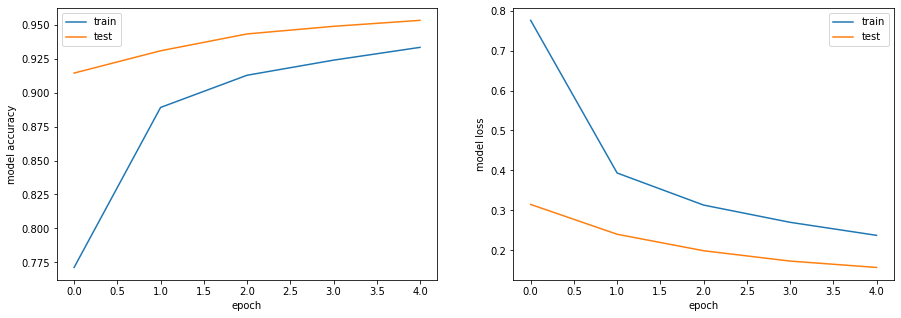

In [62]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
fig= plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [63]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Nadam(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [64]:
# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2714 - acc: 0.9207 - val_loss: 0.1060 - val_acc: 0.9662
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1197 - acc: 0.9656 - val_loss: 0.0924 - val_acc: 0.9720
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0849 - acc: 0.9746 - val_loss: 0.0970 - val_acc: 0.9727
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0673 - acc: 0.9797 - val_loss: 0.0797 - val_acc: 0.9778
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0546 - acc: 0.9837 - val_loss: 0.0817 - val_acc: 0.9779


313/313 [==============================] - 1s 3ms/step - loss: 0.0817 - acc: 0.9779

Test loss: 0.08169836550951004
Test accuracy: 0.9779000282287598


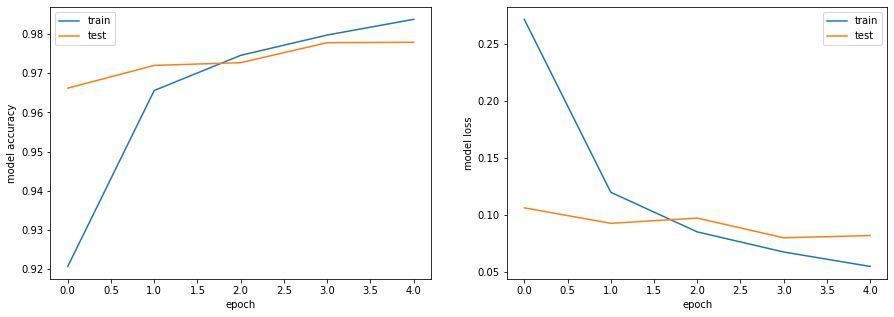

In [65]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
fig= plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Utilizzando l'ottimizzatore Nadam si raggiungono risultati migliori rispetto a quando si è usato l'ottimizzatore SGD, osservando però un diverso andamento per l'accuracy e la loss del test le quali presentano risultati peggiori rispetto al train. 

In [66]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [67]:
# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2878 - acc: 0.9160 - val_loss: 0.1142 - val_acc: 0.9650
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1252 - acc: 0.9641 - val_loss: 0.0862 - val_acc: 0.9731
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0883 - acc: 0.9734 - val_loss: 0.0788 - val_acc: 0.9756
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0682 - acc: 0.9798 - val_loss: 0.0760 - val_acc: 0.9779
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0573 - acc: 0.9825 - val_loss: 0.0770 - val_acc: 0.9782


313/313 [==============================] - 1s 3ms/step - loss: 0.0770 - acc: 0.9782

Test loss: 0.07704499363899231
Test accuracy: 0.9782000184059143


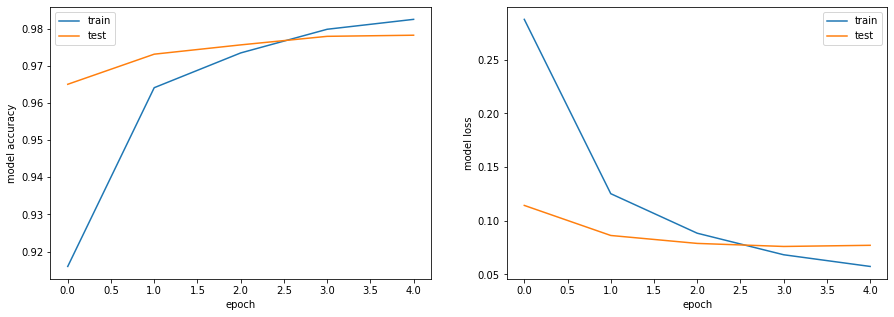

In [68]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
fig= plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Utilizzando l'ottimizzatore Nadam si raggiungono risultati migliori rispetto a quando si è usato l'ottimizzatore SGD, osservando però un diverso andamento per l'accuracy e la loss del test le quali presentano risultati peggiori rispetto al train.
Tale differenza nel rapporto tra test e train rispetto al SGD si può ricondurre al fatto che Adam e Nadam fanno uso di un gradiente stocastico a differenza del SGD che usa un gradiente.

## <span style="color:green"> Esercizio 2 </span>

In [70]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [103]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,AveragePooling2D

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(AveragePooling2D(pool_size=(2,2), strides=None, padding="valid"))
    model.add(Conv2D(20, kernel_size=(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding="valid"))
    
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(10, activation='softmax'))


    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [104]:

# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.5653 - acc: 0.8274 - val_loss: 0.1547 - val_acc: 0.9535
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1792 - acc: 0.9459 - val_loss: 0.0997 - val_acc: 0.9686
Epoch 3/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1357 - acc: 0.9594 - val_loss: 0.0803 - val_acc: 0.9771
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1158 - acc: 0.9646 - val_loss: 0.0671 - val_acc: 0.9789
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0598 - acc: 0.9822

Test loss: 0.05978195741772652
Test accuracy: 0.982200026512146


313/313 [==============================] - 3s 8ms/step - loss: 0.0598 - acc: 0.9822

Test loss: 0.05978195741772652
Test accuracy: 0.982200026512146


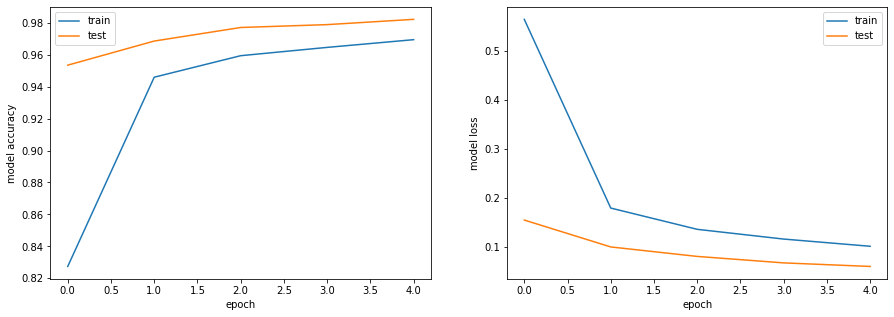

In [105]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
fig= plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

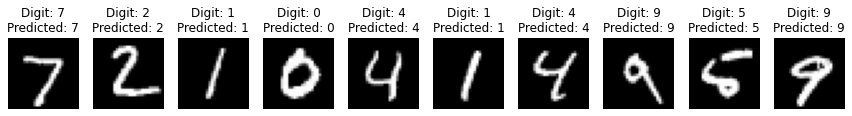

In [106]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Osserviamo nel CNN un miglioramento della accuracy rispetto al DNN, 0.9660 contro 0.933, a parità di ottimizzatore in questo caso il SGD anche se viene richiesto più tempo per allenare la rete neurale a parità di epoche.


## <span style="color:green"> Esercizio 3 </span>

In [83]:
# TO LOAD FILES ON GOOGLE COLAB
from google.colab import files
upload = files.upload() #this will let you browse and choose the file to be uploaded

Saving noveb.png to noveb.png
Saving quattrob.png to quattrob.png
Saving zerob.png to zerob.png


In [85]:

digit_filename = ["zero.png","zerob.png","uno.png","due.png","tre.png","quattro.png","quattrob.png","cinque.png","sei.png","sette.png","otto.png","nove.png","noveb.png"]

Image size: 28x28


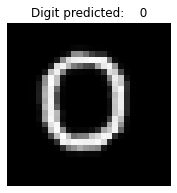

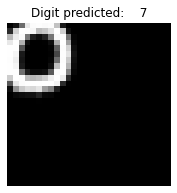

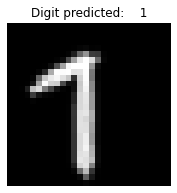

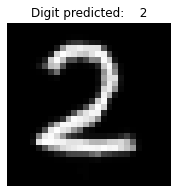

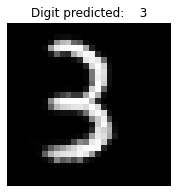

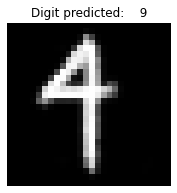

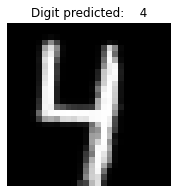

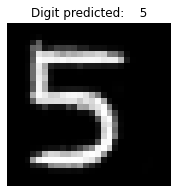

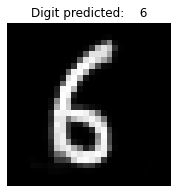

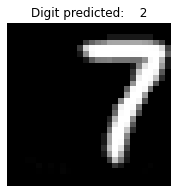

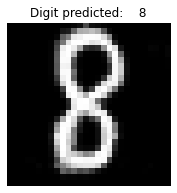

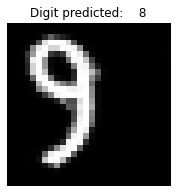

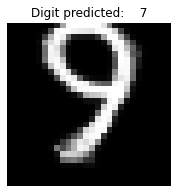

In [107]:
from PIL import Image
import os

digit_in = Image.open(digit_filename[0]).convert('L')
ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
for i in range(13):
    digit_in = Image.open(digit_filename[i]).convert('L')
    pix=digit_in.load();

    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[k,j]=pix[j,k]

    data /= 255
    data = data.reshape(1,xdim,ydim,1)
    pred_0 = model_CNN.predict(data)
    data = data.reshape(xdim,ydim)

    plt.figure(figsize=(3, 3))
    plt.imshow(data, cmap='gray')    
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off') 
    
plt.show()

Dei numeri scritti a mano il CNN presenta difficoltà a riconoscere i nove ed in generale i numeri non centrati nel layer, per quanto riguarda il quattro che sembra riconoscerne solo un tipo di scrittura è ragionevole supporre che sia per il dataset di training.